### **Student performance indicator**
#### Life cycle of Machine learning Project

* Understand the problem Statement
* Data Collection
* Data Checks to perform
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose best model

1) Problem Statement
* This Project understand how the student's performance (test score) is affected by other variables such as Gender ,Ethnicity,Parental level of education,Lunch and test prepartion course

In [1]:
#  import important library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the dataset
df=pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Clean the dataset

In [3]:
# check the missing values
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

**Their are no missing values**

In [4]:
# Check the duplicate
df.duplicated().sum()

np.int64(0)

**Their are no duplicate values**

In [5]:
# Check the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
# See the unique valaue
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [7]:
# Seen the Statistics of dataset
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
# categorical and numerical feature
categorical_feature=[feature for feature in df.columns if df[feature].dtype =='object']
numerical_feature=[feature for feature in df.columns if df[feature].dtype !='O']
print('categorical_feature :-->',categorical_feature)
print('numerical_feature :-->',numerical_feature)

categorical_feature :--> ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
numerical_feature :--> ['math_score', 'reading_score', 'writing_score']


In [9]:
for cat in categorical_feature:
    print(f"categorical in {cat}\n{df[cat].unique()}\n{'='*100}")


categorical in gender
['female' 'male']
categorical in race_ethnicity
['group B' 'group C' 'group A' 'group D' 'group E']
categorical in parental_level_of_education
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categorical in lunch
['standard' 'free/reduced']
categorical in test_preparation_course
['none' 'completed']


Adding  columns for toal score and average

In [10]:
df['total score']=df['math_score']+df['reading_score']+df['writing_score']
df['average']=df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [11]:
# Calculate how many student get the full marks in indivible subjects
reading_full=df[df['reading_score']==100]['average'].count()
writing_full=df[df['writing_score']==100]['average'].count()
math_full=df[df['math_score']==100]['average'].count()
print(f'Number of student with full marks in Math: {math_full}')
print(f'Number of student with full marks in writing:{writing_full}')
print(f'Number of student with full marks in Reading: {reading_full}')

Number of student with full marks in Math: 7
Number of student with full marks in writing:14
Number of student with full marks in Reading: 17


In [12]:
# Calculate the student that get the less then 20
reading_less_20=df[df['reading_score']<=20]['average'].count()
writing_less_20=df[df['writing_score'] <=20]['average'].count()
math_less_20=df[df['math_score']<=20]['average'].count()
print(f'Number of student with full marks in Math: {math_less_20}')
print(f'Number of student with full marks in writing:{writing_less_20}')
print(f'Number of student with full marks in Reading: {reading_less_20}')

Number of student with full marks in Math: 4
Number of student with full marks in writing:3
Number of student with full marks in Reading: 1


**Insights** :
Math Student get the less marks as compared to other other subjects

#### **Visualization**

1. Visualize average score distribution to make some conlusion
* Histrogram
* Kernal Distribution

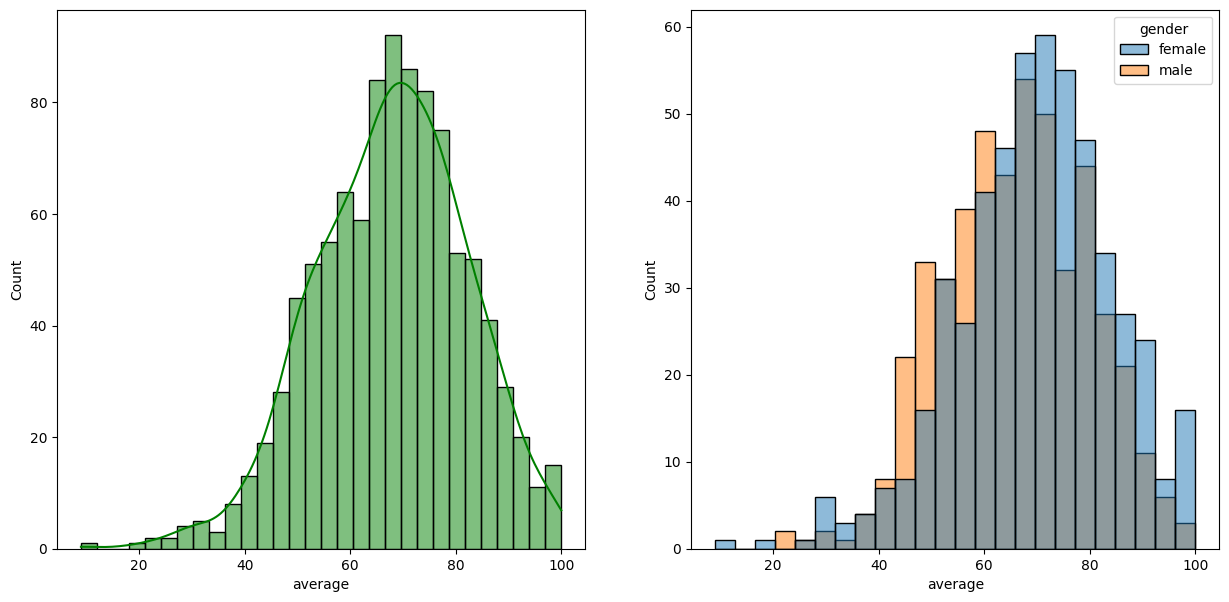

In [13]:
# Visualization of average marks with gender
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',hue='gender')
plt.show()

conclusion:-
Female student tend to perform well then male students.